<a href="https://colab.research.google.com/github/christophermalone/stat360/blob/main/Handout9.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Handout #9: Matrix Representation of SLR Model

<table width='100%' ><tr><td bgcolor='green'></td></tr></table>

## Example 9.1: Nutrition Data

Consider the following data collected on a variety of menu items from various fast-food restaurants.  
<table>
  <tr>
    <td width='50%'>
      <ul>
          <li>Restaurant: Name of restaurant</li>
          <li>Item: Menu item</li>
          <li>Type: Type of menu item, e.g. sub, pizza, wrap, sandwich, etc</li>
          <li>Breakfast: Is this primarily a breakfast item</li>
          <li>ServingSize: Serving Size</li>
          <li>Calories: Calories per serving</li>
          <li>TotalFat: Total fat per serving</li>
          <li>SaturatedFat: Saturated fat per serving</li>
          <li>Cholesterol: Cholesterol per serving</li>
          <li>Sodium: Sodium per serving</li>
          <li>TotalCarbs: Total carbs per serving</li>
          <li>Fiber: Fiber per serving</li>
          <li>Sugar: Sugar per serving</li>
          <li>Protein: Protein per serving</li>
        </ul>
    </td>
  <td width='50%'>
<p align='center'><img src="https://drive.google.com/uc?export=view&id=1IyBujqqB1cse-0mboxvbwEEftc-bINB6" width='50%' height='50%'></img></p>
  </td>
</tr>
</table>

Data Folder: [OneDrive](https://mnscu-my.sharepoint.com/:f:/g/personal/aq7839yd_minnstate_edu/EmOQfrwxzzRBqq8PH_8qTmMBy-1qKgM11Hb8vzjs025EEA?e=wyShYs)



<table width='100%' ><tr><td bgcolor='green'></td></tr></table>



## Load Data into R

First, load the tidyverse package.

In [ ]:
#load the tidyverse package
library(tidyverse)

Next, load the Nutrition dataset into R using read_csv().

In [ ]:
# Reading data in using read_csv 
Nutrition <- read_csv("http://www.StatsClass.org/stat360/Datasets/Nutrition.csv")

Next, taking a look at the Nutrition dataset.

In [ ]:
#View the first few rows of data
head(Nutrition)

## SLR: Model Setup

Consider *only* the data from Wendy's along with the following setup for the simple linear regression model.

<ul>
  <li><strong>Restaurant</strong>: Wendys</li>
  <li><strong>Response Variable</strong>: SaturatedFat</li>
  <li><strong>Independent / Predictor Variable</strong>: Calories</li>
  <li><i>Assume</i> the following structure for the mean and variance functions</li>
  </ul>

<ul><ul>
  <li>$E(SaturatedFat | Calories, Restaurant = Wendys) = \beta_{0} + \beta_{1} * Calories$</li>
  <li>$Var(SaturatedFat | Calories, Restaurant = Wendys) = \sigma^{2}$</li>
</ul></ul>

The following snipit of code can be used to filter() the data down to just $Restaurant = Wendys$

In [ ]:
(Nutrition
  %>% filter(Restaurant == "Wendys")
  %>% select(Restaurant, Item, SaturatedFat, Calories)
) -> Wendys

Before preceding, check the data.frame to ensure that the filtering/selecting was done correctly.

In [ ]:
#Taking a look at the Wendys data.frame
Wendys

## SLR - Analysis

First, getting a scatterplot with the simple linear regression line.

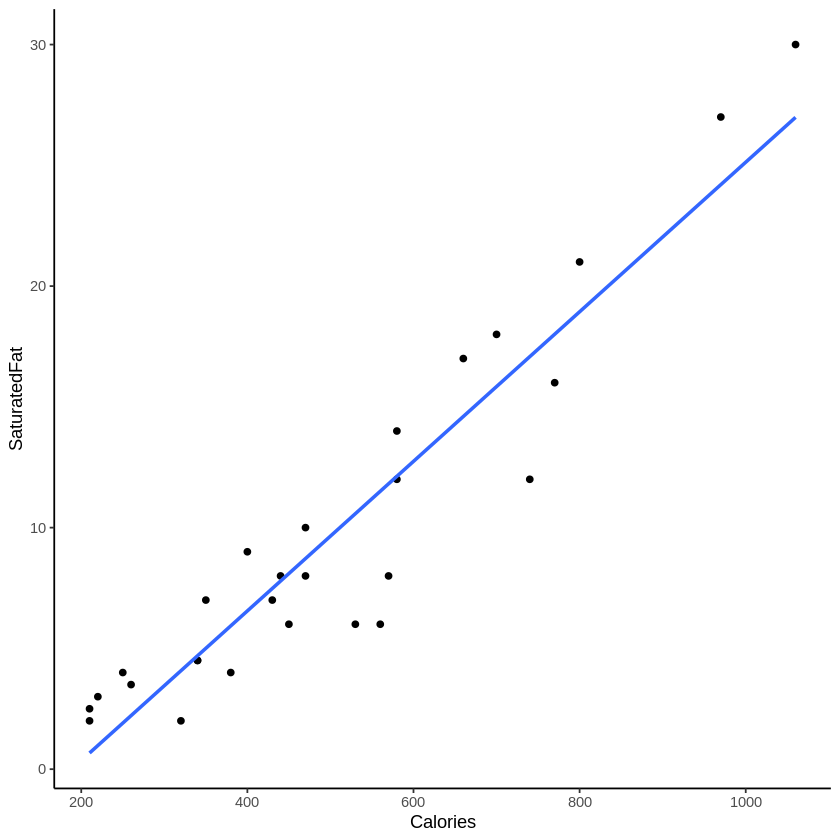

In [ ]:
# Scatterplot with simple linear regression line
ggplot(data=Wendys, aes(x=Calories,y=SaturatedFat)) + 
  geom_point() +   
  geom_smooth(method='lm', formula = y ~ x, se=FALSE) +
  theme_classic()

Next, let's fit the simple linear regression model.

In [ ]:
#Fitting the simple linear regression model
WendysLinearModel_SaturatedFat_Calories <- lm(SaturatedFat ~ Calories, data=Wendys)

Getting the simple linear regression output.

In [ ]:
#Getting a summary of the model
summary(WendysLinearModel_SaturatedFat_Calories)


Call:
lm(formula = SaturatedFat ~ Calories, data = Wendys)

Residuals:
    Min      1Q  Median      3Q     Max 
-5.5057 -1.9513  0.7454  2.0320  3.0130 

Coefficients:
             Estimate Std. Error t value Pr(>|t|)    
(Intercept) -5.833332   1.208443  -4.827 5.30e-05 ***
Calories     0.030963   0.002205  14.044 1.19e-13 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 2.564 on 26 degrees of freedom
Multiple R-squared:  0.8835,	Adjusted R-squared:  0.8791 
F-statistic: 197.2 on 1 and 26 DF,  p-value: 1.19e-13


Next, obtain the 95% confidence interval for the model parameters.

In [ ]:
#Getting 95% Confidence Intervals for Model Parameters
confint(WendysLinearModel_SaturatedFat_Calories)

,2.5 %,97.5 %
(Intercept),-8.31732270,-3.34934221
Calories,0.02643087,0.03549421


Suppose the goal is to make a prediction for a new food item with 900 Calories.  That is, estimate the value for $E(SaturatedFat | Calories = 900)$

First, create a small data.frame and set calories to 900. Recall, the name of the predictor variable(s) must match exactly the name of the predictor variable9s) in the model object.

In [ ]:
NewFoodItem <- data.frame(Calories = c(900))

Next, use the predict() function to obtain a prediction for this new food item.

In [ ]:
round(predict(WendysLinearModel_SaturatedFat_Calories,newdata = NewFoodItem),2)

1 
22.03

Using the argument interval = "confid" in the predict() function will return the 95% Confidence Interval for this prediction.

In [ ]:
predict(WendysLinearModel_SaturatedFat_Calories,newdata = NewFoodItem, interval = "confid", se=TRUE)

,fit,lwr,upr
1,22.03295,19.97316,24.09275


Likewise, using the argument interval = "predict" in the predict() function will return the 95% Prediction Interval for this prediction.

In [ ]:
predict(WendysLinearModel_SaturatedFat_Calories,newdata = NewFoodItem, interval = "predict")

,fit,lwr,upr
1,22.03295,16.37422,27.69169


## Matrix Representation of a SLR Model

Consider the following equation and its corresponding matrix representation for the simple linear regression model considered here.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1mxUozjOaoumNAYQ4xtQMG8HM0pXrDCkZ" width="25%" height="25%"></img></p>


The simple linear regression model and it corresponding matrix representation for the observed data is provided here.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=123YwYoJOsBLJYaxqt8khLtyz21HMM7xq" width="35%" height="35%"></img></p>

If the conditional distribution of $\mathbf{Y}|\mathbf{X}$ is $Normal$ with mean equal to $\mathbf{X}\underline{\mathbf{\beta}}$ and constant variance equal to $\sigma^{2}$, then the following expression is used to represent the distributional assumptions for the conditional distribution when using matrix notation.

$$ \mathbf{Y}|\mathbf{X} \sim N(\mathbf{X}\underline{\mathbf{\beta}} \space , \space \sigma^{2} \mathbf{I} ) 
$$

where $\mathbf{I}_{nxn}$ identity matrix. Some express the fact that the variablity comes *solely* from the error term using the following expression. 

$$\underline{\mathbf{\epsilon}} \sim N(\underline{\mathbf{0}} \space , \space \sigma^{2}*\mathbf{I})
$$

which written out explicitly is

$$\begin{array}{rcl}
\left[
  \begin{array}{c}
  \epsilon_{1} \\
  \epsilon_{2} \\
  \epsilon_{3} \\
  \vdots \\
  \vdots \\
  \epsilon_{27} \\
  \epsilon_{28} \\
  \end{array}
\right] & \sim & 
N
\left(
  \left[
    \begin{array}{c}
     0 \\
     0 \\
     0 \\
     \vdots \\
     \vdots \\
     0 \\
     0 \\
    \end{array}
  \right] , \space \space \sigma^{2} * 
  \left[
    \begin{array}{ccccccc}
    1 & 0 & 0 & \cdots & \cdots & 0 & 0 \\
    0 & 1 & 0 & \cdots & \cdots & 0 & 0 \\
    0 & 0 & 1 & \cdots & \cdots & 0 & 0 \\
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
     0 & 0 & 0 & \cdots & \cdots & 1 & 0 \\
     0 & 0 & 0 & \cdots & \cdots & 0 & 1 \\
    \end{array}
  \right]
\right)
\end{array}
$$

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">Aside - Other Variance/Covariance Structures</font></td></tr></table>


**Example 9.2**: Time Series - Analysis.  One situation in which the $\sigma^2 \bf{I} $ variane/covariance structure would not be appropriate is the situation of time-series data. Consider a situation in which the Unemployment Rate in Winona, MN is to be modeled. 

<table border="0">
  <tr>
    <td align="center" valign="top" width="50%"><font size="+1">Unemployment in Winona, MN</font><br><br><img src="https://drive.google.com/uc?export=view&id=1XHcrTdH8z7yfaMUtktq884uxIcxnKOnr" width="50%" height="50%"></img></td>
    <td align="center" valign="top" width="50%"><font size="+1">Unemployment in current month is *not* <br>independent of the unemployment in previous month</font><br><br>
<img src="https://drive.google.com/uc?export=view&id=1K146qnnUlF9DrLmqFCcnH1WULqR1DXfY"  width="75%" height="75%"></img></td>

  </tr>
</table>

For time-series data, a model that uses an autoregressive (AR-1) variance/covariance structure could be used.  For an autoregressive model, the variance/covariance structure has homogeneous variances and a covariance structure that decline exponentially as the distance between observations increases.

$$\begin{array}{rcl}
\left[
  \begin{array}{c}
  \epsilon_{1} \\
  \epsilon_{2} \\
  \epsilon_{3} \\
  \vdots \\
  \vdots \\
  \epsilon_{27} \\
  \epsilon_{28} \\
  \end{array}
\right] & \sim & 
N
\left(
  \left[
    \begin{array}{c}
     0 \\
     0 \\
     0 \\
     \vdots \\
     \vdots \\
     0 \\
     0 \\
    \end{array}
  \right] , \space \space \sigma^{2} * 
  \left[
    \begin{array}{ccccccc}
    1 & \rho & \rho^{2} & \cdots & \cdots & \rho^{27} & \rho^{28} \\
    \rho & 1 & \rho & \cdots & \cdots & \rho^{26} & \rho^{27} \\
    \rho^{2} & \rho & 1 & \cdots & \cdots & \rho^{25} & \rho^{26} \\
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
    \vdots & \vdots & \vdots & \ddots & \ddots & \vdots & \vdots \\ 
     \rho^{27} & \rho^{26} & \rho^{25} & \cdots & \cdots & 1 & \rho \\
     \rho^{28}  & \rho^{27}  & \rho^{26}  & \cdots & \cdots & \rho & 1 \\
    \end{array}
  \right]
\right)
\end{array}
$$

**Example 9.3**:  Repeated Measures Analysis. Consider the following data structure in which glucose levels were measured on a total of 59 subjects at baseline and at three repeated time points, i.e. baseline, 30 minutes, 60 minutes, and 90 minutes.  Subjects were randomly assigned to the Treatment Group = Relaxation or Treatement Group = Control. In this particular situation, the standard constant variance assumption is not appropriate.

<table border="0">
  <tr>
    <td align="center" valign="top" width="50%"><img src="https://drive.google.com/uc?export=view&id=1_SbzGtxVMSoOfOcsse15dv4MKJMNpz7c" width="75%" height="75%"></img></td>
    <td align="center" valign="top" width="50%"><font size="+1">1<sup>st</sup> four observations are *not* independent,<br>(i.e. same person; same for next four, etc)</font><br>
<img src="https://drive.google.com/uc?export=view&id=1qyUO_Pilg8nRIJod_5tfFlRucEzB2GMl"  width="75%" height="75%"></img></td>
  </tr>
</table>

A better modeling approach for the error structure would be to allow the errors within a subject to be correlated with each other.




<p align="center"><img src="https://drive.google.com/uc?export=view&id=19K3MqraMmShXcU5zYnNjFsyLubZ3NWCa" width="75%" height="75%"></img></p>

<table width='100%'><tr><td bgcolor="orange"><font color="white" size="+2">&nbsp;</font></td></tr></table>


## Matrix Results for Linear Models

Consider the following definitions for the matrix representation of a simple linear regression model.

<p align="center"><img src="https://drive.google.com/uc?export=view&id=1gDawT5p-mndhnAM0ND0Fu9unh2Ip9E3a" width="50%" height="50%"></img></p>

The following results follow:

>  $\underline{\mathbf{\hat{\beta}}} = (\mathbf{X'X})^{-1} \mathbf{X'Y}$

>  $Var(\underline{\mathbf{\hat{\beta}}}) = \hat{\sigma}^{2}(\mathbf{X'X})^{-1}$


where 

>  $\hat{\sigma}^{2} = \frac{\hat{\bf{r}}' \hat{\bf{r}}}{(n-2)}$, and 

> $\bf{r} = (\bf{y} - \bf{X}\underline{\hat{\bf{\beta}}})$



Suppose a prediction is to be made for a food item from Wendy's that is known to have $Calories = 900$.

$$ \begin{array}{rcl}
\hat{E}(SaturatedFat | Calories = 900) & =  & -5.83 + 0.031 * 900 \\
 & =  & 22.07  \\
\end{array}
$$

When using the matrix reprentation, such a calculation is called a **linear combination** of the estimated parameter vector.

$$ \begin{array}{rcl}
 & = & \mathbf{c}\underline{\mathbf{\hat{\beta}}} \\
 & = & \left[ \begin{array}{cc} 1 & 900 \\ \end{array} \right] \left[ \begin{array}{cc} -5.83 \\ 0.031 \\ \end{array} \right] \\
 & = & 22.03 \\
\end{array}
$$

The variance/covariance of a linear combination of the estimated parameter vector is given by the following result:

>  $\begin{array}{rcl} Var(\mathbf{c}\underline{\mathbf{\hat{\beta}}}) & = &  \mathbf{c} \space Var(\underline{\mathbf{\hat{\beta}}}) \space \mathbf{c'}\\
& = &  \mathbf{c} [\hat{\sigma}^{2}(\mathbf{X'X})^{-1}]\mathbf{c'} \\ \end{array}$


## Matrix Algebra for Wendy's Example

In this section, the various matrix computations will be done for the Wendy's exmaple.  

In [ ]:
#determine how many rows are in the Wendys data.frame.
dim(Wendys)

[1] 28  4

The first step is to create the design matrix $\bf{X}$.

In [ ]:
#Setting up the X matrix
x0 <- rep(1,28)
x1 <- Wendys$Calories

#Create the matrix
X <- cbind(x0,x1)

#Print the X matrix
print(X)

Next, create the response vector $\bf{y}$.

In [ ]:
y <- Wendys$SaturatedFat

#Print the response vector
print(y)

The matrix $(\bf{X'X})^{-1}$ is needed in order to compute the estimated parameter vector. 

In [ ]:
#Getting X'X inverse
#First, create XpX
XpX <- t(X) %*% X
cat("\n X'X:\n")
print(XpX)

#Next, getting its inverse
XpXInv <- solve(XpX, diag(2) )
cat("\n (X'X)^-1:\n")
print(XpXInv)

### Getting $\underline{\hat{\bf{\beta}}} = (\bf{X^{'}}\bf{X})^{-1} \bf{X^{'}} \bf{y}$

In [ ]:
#Getting the estimated model parameters
BetaHat<- XpXInv %*% t(X) %*% y
cat("\n Betahat:\n")
print(BetaHat)

### Getting the Predicted Values and Residuals

Next, the predicted values are computed as follows $\hat{\bf{y}} = \bf{X}\underline{\hat{\bf{\beta}}}$.

In [ ]:
#Getting the predicted values
yPredicted <- X %*% BetaHat
print(yPredicted)

            [,1]
 [1,] 12.1249406
 [2,] 18.9366993
 [3,] 26.9869597
 [4,]  8.7190612
 [5,] 17.0789470
 [6,] 24.2003311
 [7,] 14.6019438
 [8,] 15.8404454
 [9,]  6.5516834
[10,]  5.0035565
[11,]  1.9073025
[12,]  0.9784263
[13,]  8.0998104
[14,]  2.2169279
[15,]  7.4805596
[16,]  4.6939311
[17,]  5.9324326
[18,] 11.5056898
[19,] 10.5768136
[20,]  4.6939311
[21,] 11.8153152
[22,]  7.7901850
[23,] 18.0078231
[24,]  0.6688009
[25,]  8.7190612
[26,] 12.1249406
[27,]  4.0746803
[28,]  0.6688009


Next, computing the residuals for the Wendy's example.

>  $\begin{array}{rcl} \bf{r} & = & (\bf{y} - \bf{X}\underline{\hat{\bf{\beta}}}) \\ & = & (\bf{y} - \hat{\bf{y}})\end{array}$

In [ ]:
#Computing the residual vector 
Residuals <- (y - yPredicted)
print(Residuals)

            [,1]
 [1,]  1.8750594
 [2,]  2.0633007
 [3,]  3.0130403
 [4,]  1.2809388
 [5,] -5.0789470
 [6,]  2.7996689
 [7,]  2.3980562
 [8,]  2.1595546
 [9,]  2.4483166
[10,]  1.9964435
[11,]  2.0926975
[12,]  2.0215737
[13,] -2.0998104
[14,]  1.2830721
[15,] -0.4805596
[16,] -0.1939311
[17,] -1.9324326
[18,] -5.5056898
[19,] -4.5768136
[20,] -0.1939311
[21,] -3.8153152
[22,]  0.2098150
[23,] -2.0078231
[24,]  1.3311991
[25,] -0.7190612
[26,] -0.1249406
[27,] -2.0746803
[28,]  1.8311991


### Getting $\hat{\sigma}^2$

The Sum-of-Squared Residuals can easily be obtained using $(\bf{r'r})$.  Dividing this by $(n-2)$ yields $\hat{\sigma}^{2} = \mbox{Mean-Squared Error}$

In [ ]:
#Getting the variance in the conditional distribution
SigmaHatSquared <- t(Residuals)%*%Residuals / (28-2)
cat("SigmaHat-Squared\n")
print(SigmaHatSquared)

SigmaHat-Squared
         [,1]
[1,] 6.574491


### Getting $Var(\underline{\hat{\beta}})$

In [ ]:
#Variance/Covariance of BetaHat
Var_BetaHat <- 6.57 * XpXInv
cat("Var(BetaHat): \n")
print(Var_BetaHat)

Var(BetaHat): 
           [,1]          [,2]
x0  1.459336973 -2.438936e-03
x1 -0.002438936  4.857055e-06


### Getting the Variance of Linear Combination, i.e. $Var(\mathbf{c}\underline{\mathbf{\hat{\beta}}})$ 

Recall, a prediction was needed for a new food item with Calories = 900. Here, a vector containing the multiplier for $\hat{\beta}_{0}$ and $\hat{\beta}_{1}$ is created for the linear combination.

In [ ]:
#Creating a vector for the linear combination
NewFoodItem <- cbind( x0=c(1) , x1=c(900) )
NewFoodItem

x0,x1
1,900


Next, use this linear combination to obtain the desired prediction. 

$$\begin{bmatrix}
1&900 \\
\end{bmatrix} * \begin{bmatrix} \hat{\beta_{0}} \\ \hat{\beta}_{1}\end{bmatrix}$$

In [ ]:
#Getting the predicted value for Calories = 900
Prediction_Calories900 <- NewFoodItem %*% BetaHat
Prediction_Calories900

22.03295


Note:  The variance for a linear comibination of the estimated model parameters is given by 

$$
Var({\bf{c}} * \hat{\bf{\underline{\beta}}}) = {\bf{c}} * Var(\hat{\bf{\underline{\beta}}})*{\bf{c'}} 
$$

Using this result, the variance for this prediction is computed as follows

In [ ]:
NewFoodItem %*% Var_BetaHat %*% t(NewFoodItem)

1.003468


The 95% Confidence Interval for this prediction is given by the following code.

In [ ]:
LowerCI <- Prediction_Calories900 - qt(0.975,df=26) * sqrt(1.003468)
UpperCI <- Prediction_Calories900 + qt(0.975,df=26) * sqrt(1.003468)

cat("The 95% CI is for this prediction is",round(LowerCI,2), "up to",round(UpperCI,2),".\n")

The 95% CI is for this prediction is 19.97 up to 24.09 .


The 95% Prediction Interval for this prediction is given by the following code.

In [ ]:
LowerPI <- Prediction_Calories900 - qt(0.975,df=26) * sqrt(1.003468 + 6.574)
UpperPI <- Prediction_Calories900 + qt(0.975,df=26) * sqrt(1.003468 + 6.574)

cat("The 95% PI is for this prediction is",round(LowerPI,2), "up to",round(UpperPI,2),".\n")

The 95% PI is for this prediction is 16.37 up to 27.69 .


## Testing Multiple Parameters

**Example 9.3**: Consider the follwing situation.  Suppose a risk score is obtained for a particular disease.  Patients are evaluated at the onset of their disease and given a risk score.  After three months of treatment, patients are reevaluated and a second risk score measurement is obtained. 

<table border="0">
  <tr>
    <td align="center" valign="center" width="50%" bgcolor="lightgray"><font size="+2">Situation #1</font></td>
    <td align="center" valign="center" width="50%" bgcolor="lightgray"><font size="+2">Situation #2</font></td>
    </tr>
    <tr>
    <td align="center" valign="center" width="50%"><img src="https://drive.google.com/uc?export=view&id=1teZ1dy0VqeyUcHT92D2dUTF0f-Gm48fZ" width="75% height="75%"></img></td>
    <td align="center" valign="center" width="50%"><img src="https://drive.google.com/uc?export=view&id=1dRnkDAZzNYDaJ7WfoWWLuw_P1PXdSWDv"  width="75% height="75%"></img></td>
  </tr>
  <tr>
    <td align="center" valign="center" width="50%" bgcolor="lightgray"><font size="+2">Situation #3</font></td>
    <td align="center" valign="center" width="50%" bgcolor="lightgray"><font size="+2">Situation #4</font></td>
    </tr>
    <tr>
    <td align="center" valign="center" width="50%"><img src="https://drive.google.com/uc?export=view&id=1vnuTKYZNA1Wng6Ud_3Kxqng4kWI-v6oy"  width="75% height="75%"></img></td>
    <td align="center" valign="center" width="50%"><img src="https://drive.google.com/uc?export=view&id=1loM4Fo1YN0GriDrr_E3wMb3FfbPRaC5z"  width="75% height="75%"></img></td>
  </tr>
</table>

<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">Task</font></td></tr></table>

## Task:  Questions

Discuss the effect of the treatment for each situation:

 - Situation #1
 - Situation #2
 - Situation #3
 - Situation #4





<table width='100%'><tr><td bgcolor="purple"><font color="white" size="+2">&nbsp;</font></td></tr></table>

**Research Question**:  Does the treatment produce any measureable effect after 3 months? 

The statistical hypotheses for this research question are provided here.

$$\begin{array}{rl}
H_{0}: &  \mbox{Treatment has no effect} \\
H_{A}: &  \mbox{Treatment has some effect} \\
\end{array}
$$

The following hypothesis test will permit one to test whether or not the treatment has some effect.

$$\begin{array}{rl}
H_{0}: &  \beta_{0} = 0 \space and \space \beta_{1} = 1 \\
H_{A}: &  \beta_{0} \ne 0 \space or \space \beta_{1} \ne 1 \\
\end{array}
$$

The following would be the matrix representation of this test.

$$\begin{array}{rl}
H_{0}: &  \left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \\ \end{array} \right] 
            \left[ \begin{array}{cc} \beta_{0} \\ \beta_{1}  \end{array} \right]   = \left[ \begin{array}{cc} 0 \\ 1 \end{array} \right]\\
H_{A}: &  \left[ \begin{array}{cc} 1 & 0 \\ 0 & 1 \end{array} \right] 
            \left[ \begin{array}{cc} \beta_{0} \\ \beta_{1}  \end{array} \right]   \ne \left[ \begin{array}{cc} 0 \\ 1 \end{array} \right]\\
\end{array}
$$

Conducting this statistical test requires us to use the variance/covariance structure of the model parameters, i.e. $Var(\mathbf{C}\underline{\hat{\beta}})$.  As mentioned previously, an understanding of $Var(\underline{\hat{\beta}})$ and its properties is important as its used extensively by statisticians when modeling.



---



---


End of Document